# Parcial III 
## Parte II
### Modelos Computacionales
Melannie Aranza Martínez Velasco

In [1]:
import tensorflow as tf
print("Versión de TensorFlow:", tf.__version__)


Versión de TensorFlow: 2.19.0


In [2]:
import tensorflow as tf
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [19]:
ruta_dataset = r"C:/Users/melan/OneDrive/Desktop/Neurociencias-2025-2/S03_datasets/Brain_tumor/Brain Tumor/Brain Tumor"
ruta_csv = r"C:/Users/melan/OneDrive/Desktop/Neurociencias-2025-2/S03_datasets/Brain_tumor/Brain Tumor.csv"

df = pd.read_csv(ruta_csv)

In [20]:
# Agregar extensión a nombres de las imágenes
df['Image'] = df['Image'].astype(str) + ".jpg"

# Ruta completa para cada imagen
df['filepath'] = df['Image'].apply(lambda x: os.path.join(ruta_dataset, x))

# Conversión de "clase" a "numérico"
df['Class'] = pd.to_numeric(df['Class'], errors='coerce')

In [21]:
# Dataset TensorFlow
filepaths = df['filepath'].values
labels = df['Class'].values

dataset = tf.data.Dataset.from_tensor_slices((filepaths, labels))

In [22]:
# Funcion: Carga y preprocesamiento de imagen
def load_image(filepath, label):
    image = tf.io.read_file(filepath)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128])
    image = image / 255.0
    return image, label

dataset = dataset.map(load_image)

In [23]:
# Dataset separado en entrenamiento y validación
total = len(filepaths)
train_size = int(0.8 * total)

train_dataset = dataset.take(train_size).batch(32).shuffle(1000)
val_dataset = dataset.skip(train_size).batch(32)

In [24]:
# Modelo CNN básico
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # salida binaria
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

C:\Users\melan\anaconda3\envs\tfenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Entrenamiento
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10)

print("Accuracy final en validación:", history.history['val_accuracy'][-1])

Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 38s 326ms/step - accuracy: 0.7188 - loss: 0.5711 - val_accuracy: 0.8167 - val_loss: 0.4579
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 29s 291ms/step - accuracy: 0.8101 - loss: 0.4211 - val_accuracy: 0.8499 - val_loss: 0.3736
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 30s 303ms/step - accuracy: 0.8511 - loss: 0.3294 - val_accuracy: 0.8420 - val_loss: 0.3363
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 30s 304ms/step - accuracy: 0.8998 - loss: 0.2578 - val_accuracy: 0.8353 - val_loss: 0.3841
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 29s 287ms/step - accuracy: 0.9174 - loss: 0.2073 - val_accuracy: 0.8778 - val_loss: 0.3292
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 31s 313ms/step - accuracy: 0.9439 - loss: 0.1541 - val_accuracy: 0.9004 - val_loss: 0.2744
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 31s 310ms/step - accuracy: 0.9721 - loss: 0.0899 - val_accuracy: 0.8340 - val_loss: 0.5816
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 31s 310ms/step - accuracy: 0.9548 - loss: 0.1068 - val_accu

In [27]:
# Mejorar modelo CNN 

model_mejorado = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_mejorado.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

In [28]:
history_mejorado = model_mejorado.fit(train_dataset, validation_data=val_dataset, epochs=10)

print("Accuracy final validación modelo mejorado:", history_mejorado.history['val_accuracy'][-1])

Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 76s 726ms/step - accuracy: 0.7358 - loss: 3.4067 - val_accuracy: 0.6587 - val_loss: 11.2114
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 64s 649ms/step - accuracy: 0.8137 - loss: 0.4857 - val_accuracy: 0.6587 - val_loss: 21.4918
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 65s 665ms/step - accuracy: 0.8477 - loss: 0.3640 - val_accuracy: 0.6587 - val_loss: 22.3979
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 63s 649ms/step - accuracy: 0.8263 - loss: 0.3638 - val_accuracy: 0.6587 - val_loss: 15.9156
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 67s 679ms/step - accuracy: 0.8668 - loss: 0.3111 - val_accuracy: 0.6640 - val_loss: 2.7484
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 64s 660ms/step - accuracy: 0.8764 - loss: 0.3183 - val_accuracy: 0.7543 - val_loss: 0.5890
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 66s 677ms/step - accuracy: 0.8566 - loss: 0.3117 - val_accuracy: 0.7875 - val_loss: 0.5344
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 65s 668ms/step - accuracy: 0.8619 - loss: 0.3112 - val_

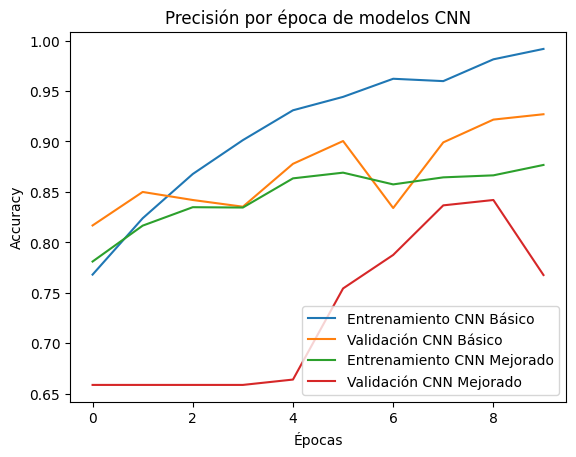

In [29]:
# Gráfico accuracy (ambos modelos)
plt.plot(history.history['accuracy'], label='Entrenamiento CNN Básico')
plt.plot(history.history['val_accuracy'], label='Validación CNN Básico')

plt.plot(history_mejorado.history['accuracy'], label='Entrenamiento CNN Mejorado')
plt.plot(history_mejorado.history['val_accuracy'], label='Validación CNN Mejorado')

plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.title('Precisión por época de modelos CNN')
plt.legend()
plt.show()

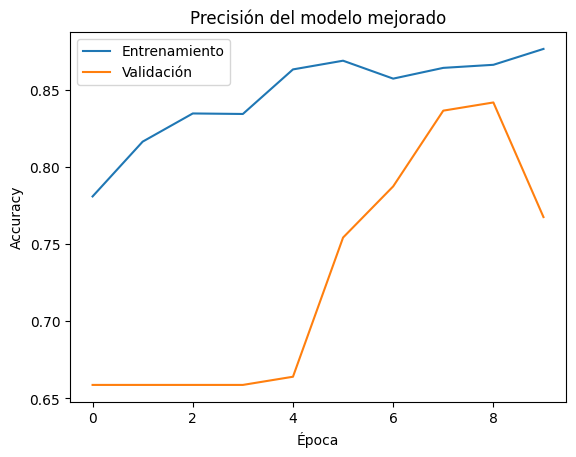

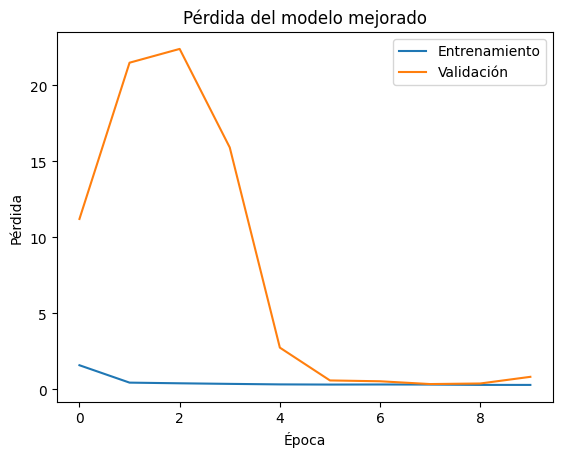

In [30]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history_mejorado.history['accuracy'], label='Entrenamiento')
plt.plot(history_mejorado.history['val_accuracy'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.title('Precisión del modelo mejorado')
plt.legend()
plt.show()

# Pérdida (Loss)
plt.plot(history_mejorado.history['loss'], label='Entrenamiento')
plt.plot(history_mejorado.history['val_loss'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida del modelo mejorado')
plt.legend()
plt.show()

In [31]:
# Comparar con modelo clásico (Random Forest con características del CSV) 

# Características: eliminamos columnas no numéricas y etiquetas
X = df.drop(columns=['Image', 'filepath', 'Class'])
y = df['Class']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

acc_rf = accuracy_score(y_val, y_pred)
print("Accuracy Random Forest:", acc_rf)

Accuracy Random Forest: 0.9840637450199203


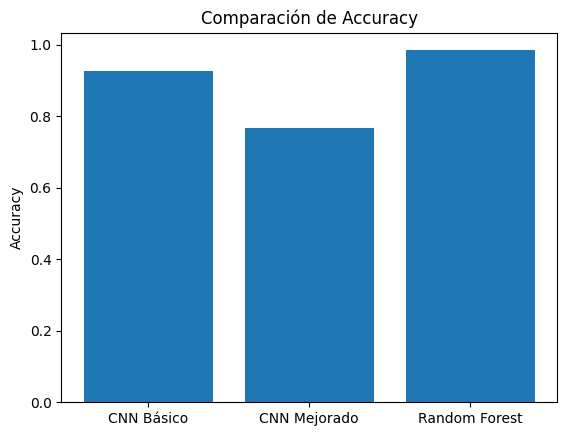

In [32]:
# Graficar comparación de accuracy 

plt.bar(['CNN Básico', 'CNN Mejorado', 'Random Forest'],
        [history.history['val_accuracy'][-1],
         history_mejorado.history['val_accuracy'][-1],
         acc_rf])
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy')
plt.show()

Creo que me salió mal TnT
